# The Relational Algebra in Python

Copyright Jens Dittrich & Marcel Maltry, [Big Data Analytics Group](https://bigdata.uni-saarland.de/), [CC-BY-SA](https://creativecommons.org/licenses/by-sa/4.0/legalcode)

### Imports

In [1]:
from os import listdir
from graphviz import Source

from ra.relation import Relation
from ra.operators_log import *
from ra.operators_phys import *
from ra.utils import load_csv

### Loading Dataset

In [2]:
# Data source: https://relational.fit.cvut.cz/dataset/IMDb
# Information courtesy of IMDb (http://www.imdb.com). Used with permission.
# Notice: The data can only be used for personal and non-commercial use and must not
# be altered/republished/resold/repurposed to create any kind of online/offline
# database of movie information (except for individual personal use).

path = 'data/IMDb_sample'  
# create a list of all files in that directory that end with "*.csv":
files = [file for file in listdir(path) if file.endswith('.csv')]

relations = [load_csv(path + '/' + file, file[:-4], delimiter='\t') for file in files]

relationsDict = {}
for rel in relations:
    relationsDict[rel.name] = rel
    #globals()[rel.name] = rel
    rel.print_table(10)

------
actors 
--------------------------------------------------------------------------------------------
id                     first_name             last_name              gender                  
--------------------------------------------------------------------------------------------
130919                 Keir                   Dullea                 M                      
110691                 Simon (I)              Davis                  M                      
792255                 Jean (I)               Simmons                F                      
260737                 Naomi                  Kusumi                 M                      
201490                 Tony (II)              Hayes                  M                      
589087                 Julie                  Croft                  F                      
519687                 Satoshi                Yamanaka               M                      
632299                 Susanne                Gibbs   

In [3]:
# build LeafRelation object from relations dictionary
movies_directors = LeafRelation(relationsDict['movies_directors'])
actors = LeafRelation(relationsDict['actors'])
directors = LeafRelation(relationsDict['directors'])
movies_genres = LeafRelation(relationsDict['movies_genres'])
directors_genres = LeafRelation(relationsDict['directors_genres'])
movies = LeafRelation(relationsDict['movies'])
roles = LeafRelation(relationsDict['roles'])

In [4]:
directors.evaluate().print_set()

[directors] : {[id:int, first_name:str, last_name:str]}
{
	(78273, Quentin, Tarantino),
	(43095, Stanley, Kubrick),
	(11652, James (I), Cameron)
}


In [5]:
directors.evaluate().print_latex()

\definecolor{tableheadercolor}{rgb}{0.8,0.8,0.8}\begin{tabular}{|l|l|l|}\hline
\multicolumn{3}{|l|}{\cellcolor{tableheadercolor}{\textbf{directors}}}\\\hline
	\cellcolor{tableheadercolor}{\textbf{id}} & \cellcolor{tableheadercolor}{\textbf{first\textunderscore name}} & \cellcolor{tableheadercolor}{\textbf{last\textunderscore name}} \\
	\hline\hline
	78273 & Quentin & Tarantino \\
	43095 & Stanley & Kubrick \\
	11652 & James (I) & Cameron \\
\hline
\end{tabular}


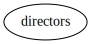

In [6]:
graph = directors.get_graph()
graph

# Basisoperatoren

## Selection

In [7]:
newmovies =  Selection_ScanBased(movies, 'year>2000')

In [8]:
print(newmovies)

σ_ScanBased[year>2000](movies)


In [9]:
newmovies.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
393538                Jimmy Kimmel Live!    2003                  6.7                   
10934                 Aliens of the Deep    2005                  6.5                   
96779                 Earthship.TV          2001                  5.6                   
127297                Ghosts of the Abyss   2003                  6.7                   
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
159665                Inglorious Bastards   2006                  8.3                   

In [10]:
newmovies.evaluate().name

'Result'

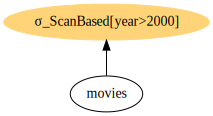

In [11]:
graph = newmovies.get_graph()
graph

## Projection

In [12]:
exp2 = Projection_ScanBased(newmovies, 'id, year')

In [13]:
print(exp2)

π_ScanBased[id, year](σ_ScanBased[year>2000](movies))


In [14]:
exp2.evaluate()

------
Result 
----------------
id      year     
----------------
393538  2003    
176711  2003    
10934   2005    
96779   2001    
176712  2004    
105938  2002    
159665  2006    
127297  2003    

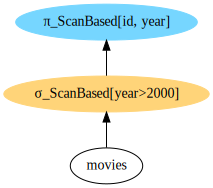

In [15]:
graph = exp2.get_graph()
graph

## Union

In [16]:
goodmovies = Selection_ScanBased(movies, 'rank>=7.5')
goodOrNew = Union_HashBased(goodmovies, newmovies)

In [17]:
print(goodOrNew)

(σ_ScanBased[rank>=7.5](movies)) ∪ (σ_ScanBased[year>2000](movies))


In [18]:
goodOrNew.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(65764, Clockwork Orange, A, 1971, 8.3),
	(177019, Killing, The, 1956, 8.1),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(267038, Pulp Fiction, 1994, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(193519, Lolita, 1962, 7.6),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(159665, Inglorious Bastards, 2006, 8.3),
	(276217, Reservoir Dogs, 1992, 8.3),
	(10920, Aliens, 1986, 8.2),
	(10934, Aliens of the Deep, 2005, 6.5),
	(121538, Full Metal Jacket, 1987, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(387728, ER, 1994, 7.7),
	(310455, Spartacus, 1960, 8.0),
	(250612, Paths of Glory, 1957, 8.6),
	(328285, Terminator, The, 1984, 7.9),
	(96779, Earthship.TV, 2001, 5.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(164572, Jackie Brown, 1997, 7.5),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Lov

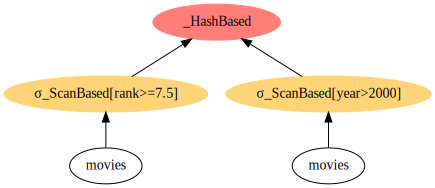

In [19]:
graph = goodOrNew.get_graph()
graph

Alternatively, without union but with two conditions in the selection instead.

In [20]:
goodOrNewSel = Selection_ScanBased(movies, 'year>2000 or rank>=7.5')

In [21]:
print(goodOrNewSel)

σ_ScanBased[year>2000 or rank>=7.5](movies)


In [22]:
goodOrNewSel.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(65764, Clockwork Orange, A, 1971, 8.3),
	(177019, Killing, The, 1956, 8.1),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(267038, Pulp Fiction, 1994, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(193519, Lolita, 1962, 7.6),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(159665, Inglorious Bastards, 2006, 8.3),
	(276217, Reservoir Dogs, 1992, 8.3),
	(10920, Aliens, 1986, 8.2),
	(10934, Aliens of the Deep, 2005, 6.5),
	(121538, Full Metal Jacket, 1987, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(387728, ER, 1994, 7.7),
	(310455, Spartacus, 1960, 8.0),
	(250612, Paths of Glory, 1957, 8.6),
	(328285, Terminator, The, 1984, 7.9),
	(96779, Earthship.TV, 2001, 5.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(164572, Jackie Brown, 1997, 7.5),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Lov

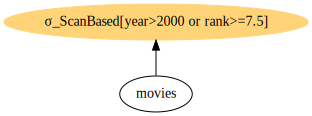

In [23]:
graph = goodOrNewSel.get_graph()
graph

## Difference


In [24]:
badmovies = Selection_ScanBased(movies, 'rank<7.5')
newGoodMovies = Difference_HashBased(newmovies, badmovies)

In [25]:
print(newGoodMovies)

(σ_ScanBased[year>2000](movies)) − (σ_ScanBased[rank<7.5](movies))


In [26]:
newGoodMovies.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
159665                Inglorious Bastards   2006                  8.3                   

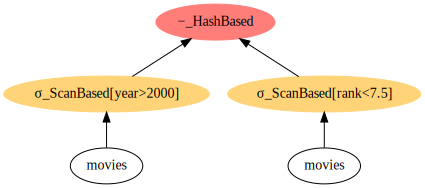

In [27]:
graph = newGoodMovies.get_graph()
graph

Alternatively, without intersection but with two conditions in the selection instead.

In [28]:
newGoodMoviesSel = Selection_ScanBased(movies, 'year>2000 and not rank<7.5')

In [29]:
newGoodMoviesSel.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
159665                Inglorious Bastards   2006                  8.3                   

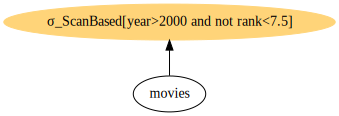

In [30]:
graph = newGoodMoviesSel.get_graph()
graph

## Cartesian Product

In [31]:
cartesianProduct = Cartesian_Product_NestedLoop(directors, directors_genres)

In [32]:
print(cartesianProduct)

(directors) × (directors_genres)


In [33]:
directors.evaluate()

---------
directors 
------------------------------------
id          first_name  last_name    
------------------------------------
78273       Quentin     Tarantino   
43095       Stanley     Kubrick     
11652       James (I)   Cameron     

In [34]:
directors_genres.evaluate()

----------------
directors_genres 
---------------------------------------
director_id  genre        prob          
---------------------------------------
43095        Documentary  0.1875       
11652        Horror       0.166667     
11652        Short        0.25         
43095        Adventure    0.0625       
43095        Drama        0.625        
43095        Music        0.0625       
11652        Comedy       0.0833333    
11652        Thriller     0.416667     
11652        Fantasy      0.0833333    
43095        Horror       0.0625       


In [35]:
len(directors_genres.evaluate()), len(directors.evaluate())

(35, 3)

In [36]:
print('number of expected tuples in cross product: ', len(directors_genres.evaluate())*len(directors.evaluate()))

number of expected tuples in cross product:  105


In [37]:
cartesianProduct.evaluate()

------
Result 
------------------------------------------------------------------------------
id           first_name   last_name    director_id  genre        prob          
------------------------------------------------------------------------------
78273        Quentin      Tarantino    43095        War          0.375        
43095        Stanley      Kubrick      43095        Romance      0.1875       
43095        Stanley      Kubrick      11652        Action       0.5          
11652        James (I)    Cameron      43095        Romance      0.1875       
11652        James (I)    Cameron      78273        Comedy       0.25         
78273        Quentin      Tarantino    43095        Short        0.1875       
78273        Quentin      Tarantino    43095        Crime        0.1875       
78273        Quentin      Tarantino    43095        Comedy       0.125        
43095        Stanley      Kubrick      43095        Sci-Fi       0.1875       
78273        Quentin      Tarantino 

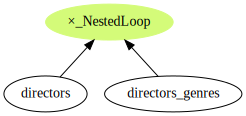

In [38]:
graph = cartesianProduct.get_graph()
graph

## Renaming Relation

In [39]:
exp11 = Renaming_Relation_ScanBased(goodOrNew, 'good_or_new')

In [40]:
exp11.evaluate().print_set()

[good_or_new] : {[id:int, name:str, year:int, rank:float]}
{
	(65764, Clockwork Orange, A, 1971, 8.3),
	(177019, Killing, The, 1956, 8.1),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(267038, Pulp Fiction, 1994, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(193519, Lolita, 1962, 7.6),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(159665, Inglorious Bastards, 2006, 8.3),
	(276217, Reservoir Dogs, 1992, 8.3),
	(10920, Aliens, 1986, 8.2),
	(10934, Aliens of the Deep, 2005, 6.5),
	(121538, Full Metal Jacket, 1987, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(387728, ER, 1994, 7.7),
	(310455, Spartacus, 1960, 8.0),
	(250612, Paths of Glory, 1957, 8.6),
	(328285, Terminator, The, 1984, 7.9),
	(96779, Earthship.TV, 2001, 5.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(164572, Jackie Brown, 1997, 7.5),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying an

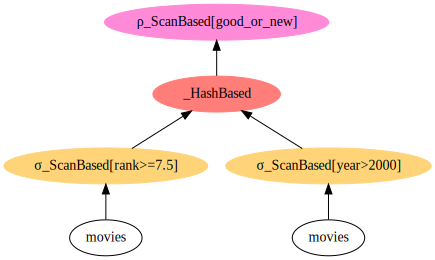

In [41]:
graph = exp11.get_graph()
graph

## Renaming Attributes

In [42]:
exp12 = Renaming_Attributes_ScanBased(exp11, 'movies<-name, published<-year')

In [43]:
exp12.evaluate().print_set(10)

[Result] : {[id:int, movies:str, published:int, rank:float]}
{
	(65764, Clockwork Orange, A, 1971, 8.3),
	(177019, Killing, The, 1956, 8.1),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(267038, Pulp Fiction, 1994, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(193519, Lolita, 1962, 7.6),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(159665, Inglorious Bastards, 2006, 8.3),
	(276217, Reservoir Dogs, 1992, 8.3),
	(10920, Aliens, 1986, 8.2)
}


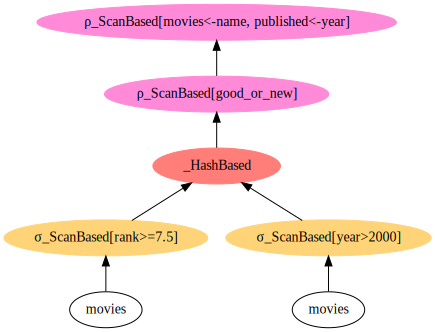

In [44]:
graph = exp12.get_graph()
graph

# Derived Operators

## Intersection

In [45]:
goodAndNew = Intersection_HashBased(newmovies, goodmovies)

In [46]:
goodAndNew.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
159665                Inglorious Bastards   2006                  8.3                   

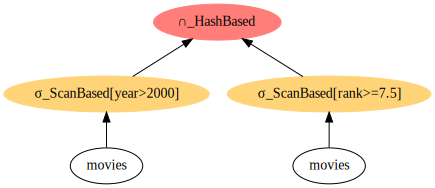

In [47]:
graph = goodAndNew.get_graph()
graph

Alternatively, without intersection but with two conditions in the selection instead:

In [48]:
goodAndNewSel = Selection_ScanBased(movies, "year>2000 and rank>=7.5")

In [49]:
goodAndNewSel.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
159665                Inglorious Bastards   2006                  8.3                   

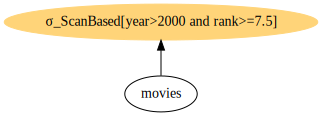

In [50]:
graph = goodAndNewSel.get_graph()
graph

## Theta Join

In [51]:
directorsAndTheirMovies = Theta_Join_NestedLoop(directors, movies_directors, "id==director_id")

In [52]:
directorsAndTheirMovies.evaluate().print_table(20)

------
Result 
-----------------------------------------------------------------
id           first_name   last_name    director_id  movie_id      
-----------------------------------------------------------------
78273        Quentin      Tarantino    78273        393538       
43095        Stanley      Kubrick      43095        92616        
11652        James (I)    Cameron      11652        328277       
43095        Stanley      Kubrick      43095        121538       
11652        James (I)    Cameron      11652        256530       
78273        Quentin      Tarantino    78273        276217       
78273        Quentin      Tarantino    78273        159665       
43095        Stanley      Kubrick      43095        299073       
11652        James (I)    Cameron      11652        10920        
43095        Stanley      Kubrick      43095        291833       
43095        Stanley      Kubrick      43095        110246       
78273        Quentin      Tarantino    78273        387728  

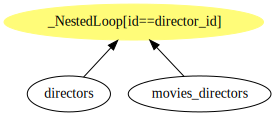

In [53]:
graph = directorsAndTheirMovies.get_graph()
graph

# Extensions

## Grouping

### Idea
Count the number of female/male actors.
* group by gender
* count the number of actors per group, count(*)

In [54]:
grouping = Grouping_HashBased(actors, 'gender', 'count(*)')

In [55]:
grouping.evaluate().print_set()

[Result] : {[gender:str, count_star:int]}
{
	(F, 289),
	(M, 802)
}


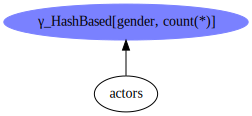

In [56]:
graph = grouping.get_graph()
graph

In [57]:
#actors.relation.print_set()

In [58]:
grouping2 = Grouping_HashBased(actors, 'first_name,last_name', 'count(*)')

In [59]:
res = Projection_ScanBased(grouping2, 'count(*)')

In [60]:
print(res)

π_ScanBased[count(*)]((γ_[first_name, last_name, count(*)] (actors))


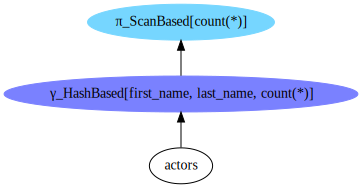

In [61]:
graph = res.get_graph()
graph

In [62]:
#res.evaluate()

In [63]:
print(grouping2)

(γ_[first_name, last_name, count(*)] (actors)


In [64]:
grouping2.evaluate()

------
Result 
---------------------------------------------------------------------
first_name             last_name              count_star              
---------------------------------------------------------------------
Dan (I)                Landin                 1                      
Hans (I)               Meyer                  1                      
Johnny (I)             Martin                 1                      
Rosalind               Ayres                  1                      
Paul                   Spelling               1                      
Gaetano                Del Grande             1                      
Robert (II)            Stevenson              1                      
Richard                Vidan                  1                      
Colette                Hiller                 1                      
Brad                   Rearden                1                      


### Idea
* group by year
* count the number of movies per year, count(*)
* sum up the movie ids per year, sum(id)
* compute average movie id per year, avg(id)

The latter two do not make sense but show that multiple aggregations can be computed in one grouping.

In [65]:
grouping = Grouping_HashBased(movies, 'year', 'count(*), sum(id), avg(id)')

In [66]:
res2 = Projection_ScanBased(grouping, 'avg(id)')

In [67]:
#res2.evaluate()

In [68]:
print(res2)

π_ScanBased[avg(id)]((γ_[year, count(*), sum(id), avg(id)] (movies))


In [69]:
graph = res2.get_graph
graph

<bound method Operator.get_graph of <ra.operators_phys.Projection_ScanBased object at 0x7f0c72d2d600>>

In [70]:
grouping.evaluate()

------
Result 
--------------------------------------------------------------------------------
year                count_star          sum_id              avg_id               
--------------------------------------------------------------------------------
1995                1                   118367              118367.0            
1996                1                   322652              322652.0            
1991                1                   328277              328277.0            
2005                1                   10934               10934.0             
2000                1                   385710              385710.0            
1955                1                   176891              176891.0            
1999                1                   106666              106666.0            
2001                1                   96779               96779.0             
1962                1                   193519              193519.0            
1968        

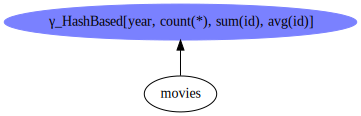

In [71]:
graph = grouping.get_graph()
graph